Part 1: Summary Statistics and Plots

In [1]:
# Import data
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

data = pd.read_csv("data.csv").set_index(["Location number", "Month"])
data.head()

State  Gross revenue   Fixed cost  Variable cost  \
Location number Month                                                    
1               1        TX    48628171.02   9218156.69    24278189.23   
                2        TX    48107179.24  10587747.35    25116844.41   
                3        TX    64352278.29  10193873.77    33703499.83   
                4        TX    45943677.96   8764165.00    24037719.47   
                5        TX    32761434.98   8022116.43    16432119.18   

                       Rental cost  Number of products  Owned  
Location number Month                                          
1               1           365880                4452  False  
                2           365880                4452  False  
                3           365880                4452  False  
                4           365880                4452  False  
                5           365880                4452  False

In [2]:
# Sum revenues and costs across months
data_annual = data.groupby(["Location number", "State", "Number of products", "Owned"]).sum()
data_annual = data_annual.reset_index().set_index("Location number")
data_annual.head()

,State,Number of products,Owned,Gross revenue,Fixed cost,Variable cost,Rental cost
Location number,,,,,,,
1,TX,4452,False,5.447389e+08,1.108956e+08,2.793687e+08,4390560
2,TX,4502,False,3.559730e+08,7.287395e+07,1.937291e+08,783240
3,IL,4620,True,3.317718e+08,6.429775e+07,1.848279e+08,0
4,GA,4481,False,2.639843e+08,6.410409e+07,1.432398e+08,1696920
5,NJ,4533,False,1.890016e+08,4.475050e+07,1.037553e+08,894000


Mean annual profit margin:  $95,453,449.83
Median annual profit margin:  $81,611,260.13



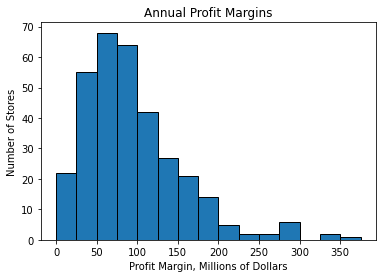

In [4]:
# Calculate and visualize annual profits, and find mean/median
data_annual["Profit"] = data_annual["Gross revenue"] - data_annual["Fixed cost"] - data_annual["Variable cost"] - data_annual["Rental cost"]
print("Mean annual profit margin: ", "${:,.2f}".format(data_annual["Profit"].mean()))
print("Median annual profit margin: ", "${:,.2f}".format(data_annual["Profit"].median()))
print()

(95,453,449.83-81,611,260.13) / 81,611,260.13
fig, ax = plt.subplots()
ax.hist(data_annual["Profit"] / 10 ** 6, bins = range(0, 400, 25), edgecolor='black')
ax.set_title("Annual Profit Margins")
ax.set_xlabel("Profit Margin, Millions of Dollars")
ax.set_ylabel("Number of Stores")
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(""))
plt.show()

While the distribution of annual profit margins does have a clear peak, it is heavily skewed right. This is also reflected by the fact that the mean is over 15% greater than the median. As such, the profit margins across locations don't look normally distributed. This is to be expected, since an unprofitable store will likely close (we see above that no store has a negative profit margin) but there is almost no limit on maximum possible profit.